# Roofline Plot for Andrew's Computer 

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import labellines

__Processor__: 3.4GHz i7-6700 quad core CPU   
__Architecture__: Alder Lake (Skylake family)  
__Memory__: 16GB RAM @ __34.1 GB/s__ (max bandwidth)  

Consider a processor with the following hardware parameters (assume 1GB = 109B):  

 - SIMD vector length of 256 bits (AVX2).  

 - Port 0 (P0): `AVX2`, `FMA`, `ADD`, `MUL`, `DIV`, `SQRT` & INT_OPS  
 - Port 1 (P1): `AVX2`, `FMA`, `ADD`, `MUL`
 - Port 5 (P2): `AVX2`, `PERMUTE`, `ADD`     
 
 - Read bandwidth from the main memory is __34.1 GB/s__.  
 - Processor frequency is __3.4 GHz__.  

In [101]:
beta_DRAM = 25.91
beta_L3 = 67.8
beta_L2 = 125.1
beta_L1 = 386.55
pi = 8
pi_scalar = 2.5
pi_or_and = 12.0
mem_comp_DRAM = pi/beta_DRAM
mem_comp_L3 = pi/beta_L3
mem_comp_L2 = pi/beta_L2
mem_comp_L1 = pi/beta_L1

I_n = [0.0, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
roofline_DRAM = [x*beta_DRAM for x in I_n]
roofline_L3 = [x*beta_L3 for x in I_n]
roofline_L2 = [x*beta_L2 for x in I_n]
roofline_L1 = [x*beta_L1 for x in I_n]
#peak_perf = [pi for i in range(len(I_n)) if pi <= I_n[i]]

#Extract I(n) from cache_misses_min_plus.csv
I_n_min_plus = []
p_n_min_plus = []
block_size = 64 #in bytes
with open("profile/cache_misses_min_plus.csv", "r") as misses_file:
    #Parse file and extract cache misses
    for line in misses_file.readlines():
        #Lines contain n,l1,b,misses
        (_n, _l1, _b, _misses, _cycles, _flops) = line.split(",")
        n = int(_n)
        misses = int(_misses)
        cycles = int(_cycles)
        n_flops = (2 * (n**3))
        data_moved = misses * block_size
        flops_cycles = n_flops / cycles
        ratio = float(_flops) / flops_cycles
        I_n_min_plus.append((float(n_flops)/float(data_moved)))
        p_n_min_plus.append(float(_flops))
        #print("N = %d, misses = %d, n_flops = %d" % (n, misses, n_flops))

#Extract I(n) from cache_misses_max_min.csv
I_n_max_min = []
p_n_max_min = []
with open("profile/cache_misses_max_min.csv", "r") as misses_file_max_min:
    #Parse file and extract cache misses
    for line in misses_file_max_min.readlines():
        #Lines contain n,l1,b,misses
        (_n, _l1, _b, _misses, _cycles, _flops) = line.split(",")
        n = int(_n)
        misses = int(_misses)
        cycles = int(_cycles)
        n_flops = (2 * (n**3))
        data_moved = misses * block_size
        flops_cycles = n_flops / cycles
        ratio = float(_flops) / flops_cycles
        I_n_max_min.append((float(n_flops)/float(data_moved))) 
        p_n_max_min.append(float(_flops))
        #print("N = %d, misses = %d, n_flops = %d" % (n, misses, n_flops))

#Extract I(n) from cache_misses_max_min.csv
I_n_or_and = []
p_n_or_and = []
with open("profile/cache_misses_max_min.csv", "r") as misses_file_max_min:
    #Parse file and extract cache misses
    for line in misses_file_max_min.readlines():
        #Lines contain n,l1,b,misses
        (_n, _l1, _b, _misses, _cycles, _flops) = line.split(",")
        n = int(_n)
        misses = int(_misses)
        cycles = int(_cycles)
        n_flops = (2 * (n**3))
        data_moved = misses * block_size
        flops_cycles = n_flops / cycles
        ratio = float(_flops) / flops_cycles
        I_n_or_and.append((float(n_flops)/float(data_moved)))
        p_n_or_and.append(float(_flops))
        #print("N = %d, misses = %d, n_flops = %d" % (n, misses, n_flops))


1623.51
[0.0, 3.23875, 6.4775, 12.955, 25.91, 51.82, 103.64]


/home/dobios/.local/lib/python3.8/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child7), but could not find a label for it.
  warnings.warn(
/home/dobios/.local/lib/python3.8/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child8), but could not find a label for it.
  warnings.warn(
/home/dobios/.local/lib/python3.8/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child9), but could not find a label for it.
  warnings.warn(
/home/dobios/.local/lib/python3.8/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child10), but could not find a label for it.
  warnings.warn(
/home/dobios/.local/lib/python3.8/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child11), but could not find a label for it.
  warnings.warn(
/home/dobios/.local/lib/python3.8/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child12), but c

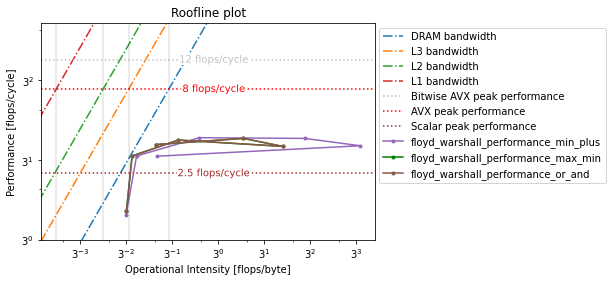

In [102]:
# Plot roofline
fig, ax = plt.subplots(1, 1)
ax.plot(I_n, roofline_DRAM, '-.', label = "25.91 GB/s")
ax.plot(I_n, roofline_L3, '-.', label = "67.8 GB/s")
ax.plot(I_n, roofline_L2, '-.', label = "125.1 GB/s")
ax.plot(I_n, roofline_L1, '-.', label = "386.55 GB/s")

ax.axhline(y = pi_or_and, color = 'silver', linestyle = ':', label = "12 flops/cycle")
ax.axhline(y = pi, color = 'r', linestyle = ':', label = "8 flops/cycle")
ax.axhline(y = pi_scalar, color = 'brown', linestyle = ':', label = "2.5 flops/cycle")
ax.plot(I_n_min_plus, p_n_min_plus, marker=".")
ax.plot(I_n_max_min, p_n_max_min, marker=".", color="green")
ax.plot(I_n_or_and, p_n_or_and, marker=".")

# Plot performances
_, ymax = ax.get_ybound()
print(ymax)
print(roofline_DRAM)
ax.axvline(x = mem_comp_DRAM,  color = 'black', alpha = 0.1, linestyle = '-') #ymax = np.log(pi) / np.log(ymax),
ax.axvline(x = mem_comp_L3, color = 'black', alpha = 0.1, linestyle = '-')
ax.axvline(x = mem_comp_L2,  color = 'black', alpha = 0.1, linestyle = '-')
ax.axvline(x = mem_comp_L1,  color = 'black', alpha = 0.1, linestyle = '-')

labellines.labelLines(plt.gca().get_lines(),zorder=2.5)

# Title axis and graph
plt.title('Roofline plot')
plt.xlabel('Operational Intensity [flops/byte]')
plt.ylabel('Performance [flops/cycle]')

# Make plot log-log
plt.xscale('log', base=3)
plt.yscale('log', base=3)
plt.ylim([0.0, 20])

# Plot legend
mylabels = ["DRAM bandwidth", "L3 bandwidth","L2 bandwidth", "L1 bandwidth", "Bitwise AVX peak performance", "AVX peak performance", "Scalar peak performance", "floyd_warshall_performance_min_plus", "floyd_warshall_performance_max_min", "floyd_warshall_performance_or_and"]
plt.legend(bbox_to_anchor = (1.35, 1), loc = 'upper center', labels = mylabels)

#plt.show()
plt.savefig("plots/roofline.pdf")